<h2>Imports</h2>

In [1]:
import wrangle as w
import vizzes as v
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('figure', figsize=(10, 7))
plt.style.use('fivethirtyeight')

----

# Time-Series Project - VP of Marketing

##### Reported by: Craig C. and Jerry N.   -   Date: April 22, 2022

<h2>Goals</h2>

- Determine the best way to launch a new marketing campaign in the near future.

- Identify targets of the marketing campaign.

- Back reccomendations of target with statistics and visualizations.

<h2>Executive Summary</h2>

- The central region of the US has the least amount of proft consiting of less than 2% of total proft.

- Within the central region Texas has the least amount of proft and in some cases we are losing profit.

- Looking at Texas, San Antonio and Houston are the largest contributors to the loss of profit. 

- The loss of profit is due to the amount of discount being applied to the products.


----

## Acquiring and Preparing the Data:

In [3]:
df = w.get_superstore_data()
df.shape

Let me get that for you...


(1734, 23)

Takeaways:
- The data is in a csv file.

Query:
- Joined the following five tables to create the dataframe:
    - Orders
    - Categories
    - Products
    - Customers
    - Regions

Our acquire provides us with a dataframe that is 23 columns and 1,723 rows of data

In [4]:
df = w.prep_superstore_data(df)
df.shape

(1734, 19)

Takeaways:
- Dropped unnecessary columns. (ID columns, Unnecessary columns, and redundant columns)
- Converted the date columns to a manipulatable format(datetime) and set as the index.
- Feature engineered three new columns (average item sale and orginal sale)

This results in dropping 4 columns and keeping all 1,734 rows of data

In [5]:
df.head(1)

,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,avg_item_sales,original_sales,discount_percent
order_date,,,,,,,,,,,,,,,,,,,
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,261.96,2.0,0.0,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South,130.98,261.96,0.0


----

## Exploring the data:

While exploring, we need to answer 2 main questions:
### 1.) What area would be the most impactful for our marketing campaign?

In order to answer this question, we went from a macro to micro overview of areas that currently produced the least profit...

#### What does profit look like based on region?

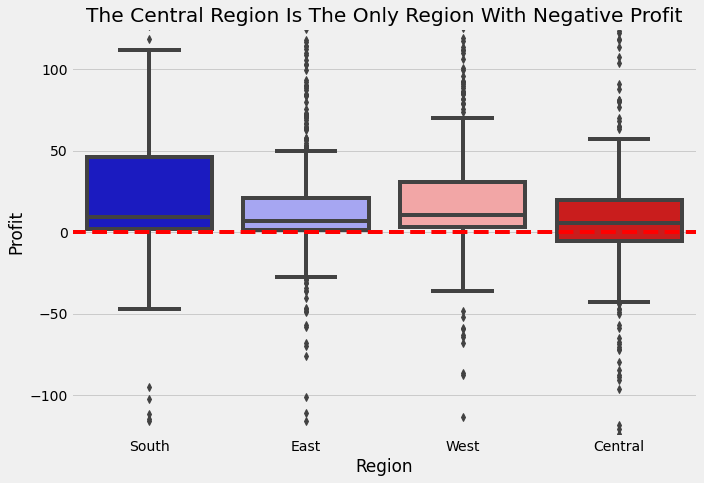

In [6]:
v.profit_by_region(df)

The data in the visual above shows that the central region of the US has the least amount of profit and in some cases we are losing profit.

#### Statistical Testing (T-Test):

- H0: Mean of Central region profit = Mean profit of all other regions
- Ha: Mean of Central region profit < Mean profit of all other regions

In [7]:
v.region_ttest(df)

Alpha: 0.05
P-Value: 0.01444
We reject the Null Hypothesis, therefore mean of central
region is significantly different from overall mean.


#### What does profit look like based on state?

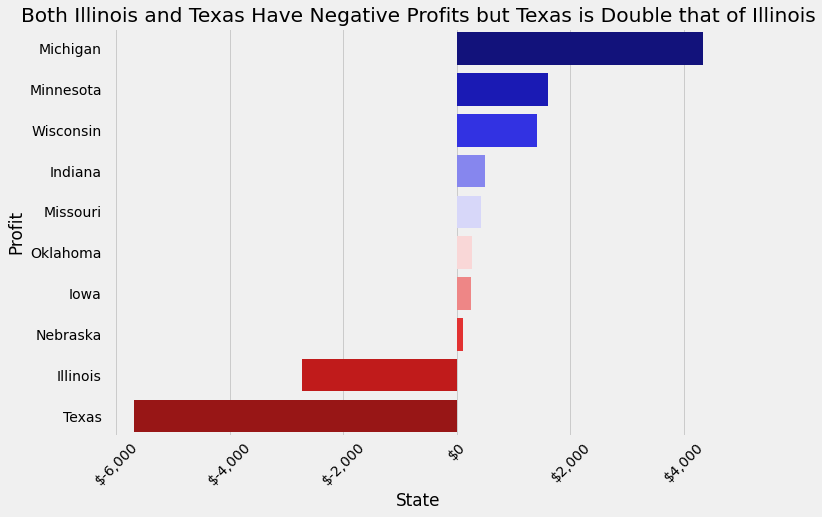

In [8]:
v.profit_by_state(df)

The data in the visual above shows that within the central region Illinois and Texas is losing profit. Texas is the largest contributor to the loss of profit.

#### Statistical Testing (T-Test):

- H0: Mean of state profit = Mean profit of all other states
- Ha: Mean of state profit < Mean profit of all other states

In [9]:
v.state_ttest(df)

Alpha: 0.05
P-Value: 0.02118
We reject the Null Hypothesis, therefore mean of 
Texas profit is significantly different from the overall mean proft.


#### What does profit look like for each city in the least profitable state (Texas)?

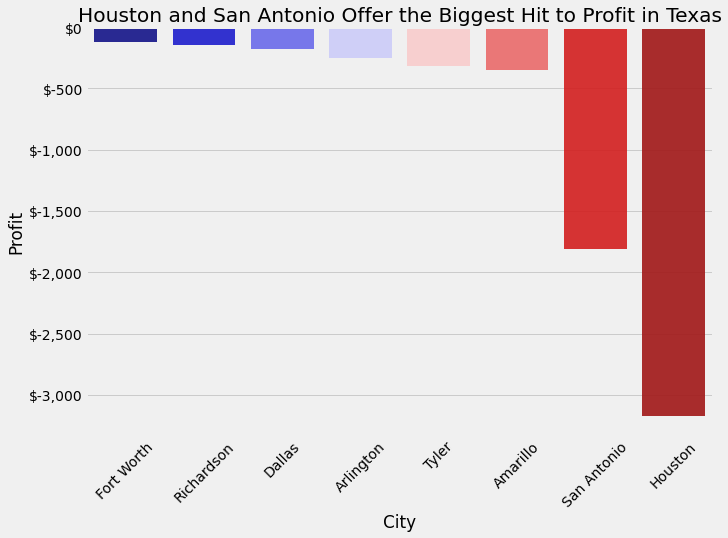

In [10]:
v.neg_profit_tx(df)

The data in the visual above shows that within Texas, San Antonio and Houston are the largest contributors to the loss of profit.

### Answer to question 1:

#### The area that will offer the biggest impact using a marketing campaign will be our Central Region with an emphasis on Texas.


----

This leads to our second question:
### 2.) Would you recomend targeting a specific type of customer, product line, or anything else?

We will use profit and discounts over time in order to identify a key driver of the loss of profit...

#### What product category can be focused on in order to improve profits?

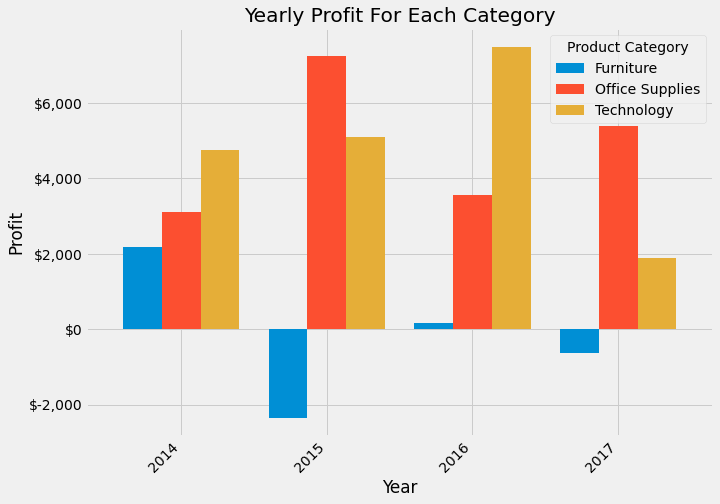

In [11]:
v.yearly_cat_profits(df)

Looking at the data, we can see that the least profitable category is "Furniture". This category is the most likely to be the focus of the marketing campaign.

#### What is causing this negative impact of profit for our furniture product category?

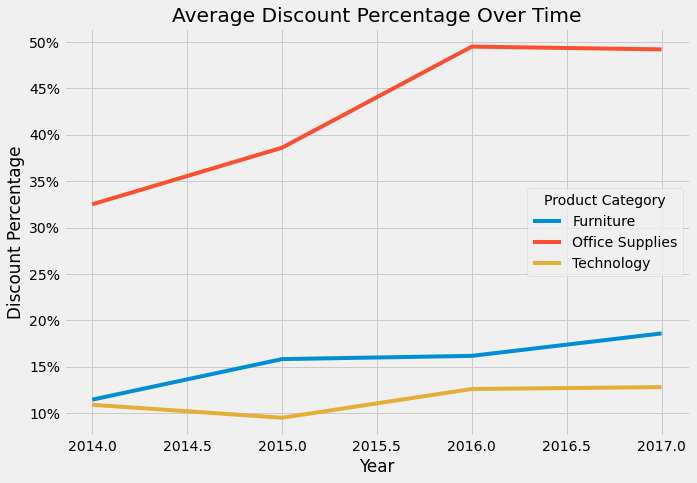

In [12]:
v.yearly_discounts(df)

The data in the visual above shows that the furniture category is linearly correlated with the amount of discount applied to the products. 

#### Statistical Testing (Pearson's r):

In [13]:
v.pearson_corr(df)

Alpha: 0.05
Pearson r: -0.5302115642139265
P-Value: 0.00000
We reject the Null Hypothesis, therefore there is linear
correlation between the furniture profit and the discount.


### Answer to question 2:
#### By visualizing the two above graphs along with their statistical analysis, we have developed the understanding that when discounts are not mindfully applied, profits suffer. 


----

### Exploratory Summary: 

To begin the exploratory data analysis, we began by going from a macro level to a micro level. Identifying the regions that are the least profitable which was the central region. Looking at the data, we identified the states that are losing the most money, than identified all the cities within the state. Once we identified the cities that are the least profitable, we then identified the products that corresponded to the loss of profits. The furniture category was directly correlated with the amount of discount applied to the products.

----

## Conclusion:

Marketing can offer the greatest impact for the Central region. In particular, the state of Texas has the greatest loss of profit with the company's largest profit-hemorraging cities in Houston and San Antonio. We believe that the best foot forward is to stop offering discounts in order to help individal categories but rather offer discounting based on quantity of product sold per order.

#### The goals of this project were to:
 - Determine the best way to launch a new marketing campaign in the near future
 - Determine the target of the campaign
 - Back reccomendations of target with statistics and visualizations
 
#### Recommendation(s):
 - Going forward, marketing campaigns must focus on discounting larger quantities sold for orders as opposed to current strategies that offer discounts for categories seen as failing based on previous reporting.

#### Next Steps:
With more time, I would like to:

 - Dive into Illinois' issues and the impact of proper marketing
 - Look into how to improve the impact of profit by individual products


----